In [59]:
# KNN Classification
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



In [60]:
zoo = pd.read_csv('C:\\Users\\Nik\\Downloads\\Zoo.csv')


In [61]:
zoo.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [62]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [63]:
#zoo['animal name']
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [64]:
zoo1=zoo.drop(['animal name'],axis=1)

In [65]:
zoo1.head(10)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [66]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(zoo1,test_size = 0.2) # 0.2 => 20 percent of entire data 


In [82]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

# for 3 nearest neighbours 
neigh = KNC(n_neighbors= 3)

# Fitting with training data 
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [83]:
# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16]) # 94 %

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16]) # 100%


In [84]:
print(train_acc)

0.9625


In [85]:
print(test_acc )

0.9047619047619048


In [86]:
# for 5 nearest neighbours
neigh = KNC(n_neighbors=5)

# fitting with training data
neigh.fit(train.iloc[:,0:4],train.iloc[:,4])

# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:4])==train.iloc[:,4])

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:4])==test.iloc[:,4])


In [87]:
print(train_acc)

0.9125


In [88]:
print(test_acc )

0.9523809523809523


In [89]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:4],train.iloc[:,4])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:4])==train.iloc[:,4])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:4])==test.iloc[:,4])
    acc.append([train_acc,test_acc])


In [90]:
print(train_acc)
print(test_acc )

0.7375
0.8571428571428571


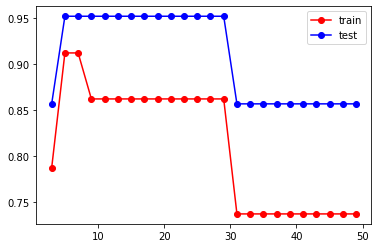

In [91]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-") #(3,50,2) 3 mean, till 50,step size 2 ex for(i=3,1<=50,i+2) #ro=red,-means connect all points
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")#bo is blue


plt.legend(["train","test"])
plt.show()

so in above graph its shows that for k value from 1 to 10 have high accuracy as well as less test amd train contrast(diffrence) so, we will plot graph for k=1 to 10 to get accurate value of k

In [92]:
# creating empty list variable 
acc1 = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(1,12,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc1 = np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc1 = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc1.append([train_acc1,test_acc1])

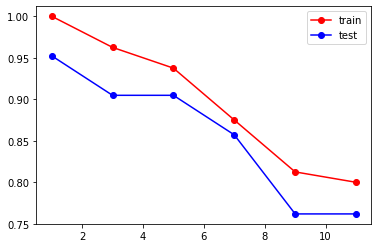

In [93]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(1,12,2),[i[0] for i in acc1],"ro-")

# test accuracy plot
plt.plot(np.arange(1,12,2),[i[1] for i in acc1],"bo-")


plt.legend(["train","test"])
plt.show()

so above graph is showing for k=5 train and test have least diffrence in their accuracy

In [95]:
# for 5 nearest neighbours
neigh = KNC(n_neighbors=5)

# fitting with training data
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
x_train = train.iloc[:,0:16]
y_train= train.iloc[:,16]
y_pred= neigh.predict(x_train)
# train accuracy 
train_acc = np.mean(y_pred==y_train)
print(train_acc)

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
print(test_acc)

0.9375
0.9047619047619048


# we will try to decrease diffrence between train and test accuracy by cross validation method


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [97]:
y1=zoo1.iloc[:,16] #9th column is our dependent variable
inputvariables1=list(zoo1) #it conatain list of all columns
del inputvariables1[16] #from that list we deleted 7th column
x1=zoo1[inputvariables1] #from rest of column we store data into x

In [98]:
# split the data set into train and test
x_1, x_test, y_1, y_test = model_selection.train_test_split(x1, y1, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
x_tr, x_cv, y_tr, y_cv = model_selection.train_test_split(x_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred1 = knn.predict(x_cv)

    # evaluate CV accuracy
    acc1 = accuracy_score(y_cv, pred1, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc1))
    


CV accuracy for k = 1 is 95%

CV accuracy for k = 3 is 95%

CV accuracy for k = 5 is 90%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 80%

CV accuracy for k = 11 is 80%

CV accuracy for k = 13 is 80%

CV accuracy for k = 15 is 76%

CV accuracy for k = 17 is 71%

CV accuracy for k = 19 is 61%

CV accuracy for k = 21 is 61%

CV accuracy for k = 23 is 47%

CV accuracy for k = 25 is 52%

CV accuracy for k = 27 is 38%

CV accuracy for k = 29 is 38%


so we are getting maximum accuracy for k=5

so we will make final model for k=5




In [99]:
knn_final= KNeighborsClassifier(5)
knn_final.fit(x_tr,y_tr)
pred_test= knn_final.predict(x_test)
acc_test= accuracy_score(y_test, pred_test, normalize=True) * float(100)
print('\n****Test accuracy for k =5  is %d%%' % (acc_test))


****Test accuracy for k =5  is 90%
